In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:

#data preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 95 files belonging to 5 classes.


In [4]:
#validation data processing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 95 files belonging to 5 classes.


In [5]:
#building the model
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
#cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.5))  #to avoid overfitting

In [9]:
#cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
#cnn.add(tf.keras.layers.Dense(units=512,activation='relu')) for building the neuron (hidden layer)
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [12]:
#cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:

#Output Layer
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [14]:
#compiling the model
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [35]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 0.1354 - accuracy: 0.9789 - val_loss: 4.1980 - val_accuracy: 0.2421
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 0.1540 - accuracy: 0.9474 - val_loss: 4.2799 - val_accuracy: 0.3053
Epoch 3/30
3/3 [==============================] - 10s 3s/step - loss: 0.1027 - accuracy: 0.9684 - val_loss: 4.3728 - val_accuracy: 0.2632
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 0.0949 - accuracy: 0.9789 - val_loss: 5.0146 - val_accuracy: 0.3579
Epoch 5/30
3/3 [==============================] - 4s 932ms/step - loss: 0.0382 - accuracy: 0.9789 - val_loss: 6.1468 - val_accuracy: 0.3895
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 0.0735 - accuracy: 0.9684 - val_loss: 7.2284 - val_accuracy: 0.2737
Epoch 7/30
3/3 [==============================] - 4s 935ms/step - loss: 0.1078 - accuracy: 0.9789 - val_loss: 5.8325 - val_accuracy: 0.3684
Epoch 8/30
3/3 [==================

In [17]:
training_history.history #Return Dictionary of history

{'loss': [204.4485626220703,
  81.97949981689453,
  3.665264368057251,
  1.8026522397994995,
  1.230776309967041,
  1.0915939807891846,
  1.0308531522750854,
  0.8996526002883911,
  0.6328216791152954,
  0.5430604219436646,
  0.45060497522354126,
  0.3355051875114441,
  0.20990489423274994,
  0.15076696872711182,
  0.18524070084095,
  0.1806948035955429,
  0.07330863177776337,
  0.12311959266662598,
  0.028043406084179878,
  0.05099288374185562,
  0.06508338451385498,
  0.023496394976973534,
  0.1568208485841751,
  0.06798020750284195,
  0.07604145258665085,
  0.08640538901090622,
  0.06982579827308655,
  0.0554041713476181,
  0.07089386880397797,
  0.2463390976190567],
 'accuracy': [0.21052631735801697,
  0.2526315748691559,
  0.3368421196937561,
  0.4000000059604645,
  0.5473684072494507,
  0.6105263233184814,
  0.5894736647605896,
  0.6736842393875122,
  0.8315789699554443,
  0.7894737124443054,
  0.821052610874176,
  0.9157894849777222,
  0.9157894849777222,
  0.9368420839309692,
 

In [18]:
#saving the model
cnn.save('trained_model.h5')#is the file extension for saving the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
"""#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)"""

"#Recording History in json\nimport json\nwith open('training_hist.json','w') as f:\n  json.dump(training_history.history,f)"

In [20]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [21]:
#Calculating Accuracy of Model Achieved on Validation set
#print("Accuracy: {} %".format(training_history.history['accuracy'][-1]*100))
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 24.210526049137115 %


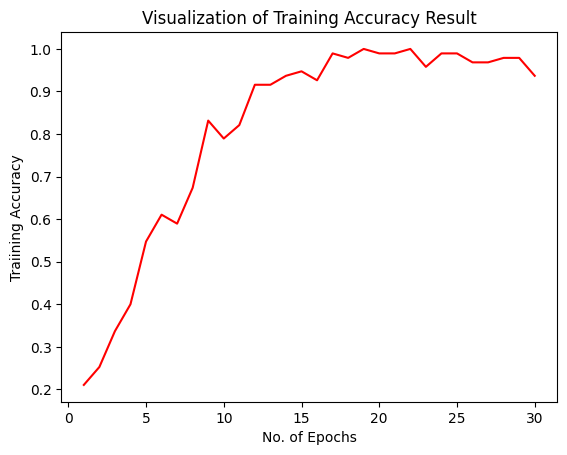

In [22]:
#training visualization
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

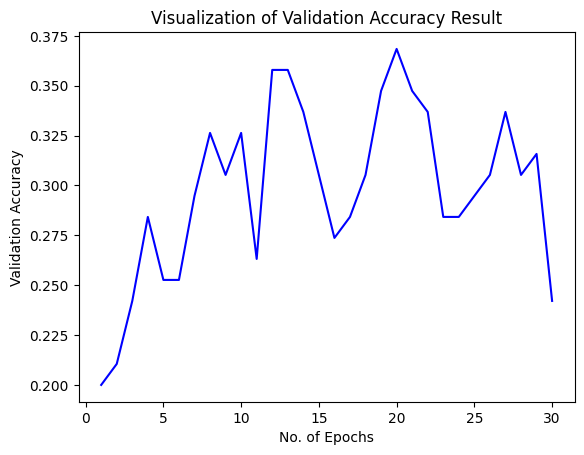

In [23]:
#validation accuracy

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [24]:
#evaluating the model
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

3/3 [==============================] - 2s 81ms/step - loss: 0.0501 - accuracy: 0.9895
Training accuracy: 0.9894737005233765


In [25]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 [==============================] - 1s 80ms/step - loss: 4.0335 - accuracy: 0.2421
Validation accuracy: 0.24210526049137115


In [26]:
#test set evaluation and test set image processing
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 95 files belonging to 5 classes.


In [27]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)


3/3 [==============================] - 15s 81ms/step - loss: 4.2789 - accuracy: 0.2211
Test accuracy: 0.2210526317358017


In [36]:
#loading the model
cnn = tf.keras.models.load_model('/content/trained_model.h5')

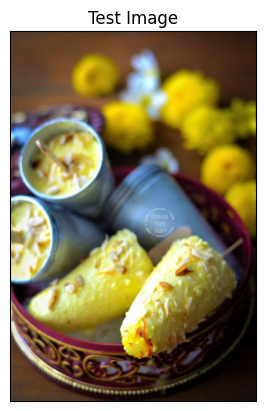

In [37]:
#testing the image and Test Image Visualization
import cv2

#image_path='/content/drive/MyDrive/food/test/pizza/11.jpg'
image_path='/content/drive/MyDrive/food/test/kulfi/17.jpg'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
#testing the model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
#print(input_arr)
predictions = cnn.predict(input_arr)

In [31]:
print(predictions)

[[1.4001324e-05 6.2487004e-03 9.9086624e-01 5.6236481e-06 2.8653950e-03]]


In [32]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


In [33]:
"""# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()"""

"# Displaying the image\nplt.imshow(img)\nplt.title('Test Image')\nplt.xticks([])\nplt.yticks([])\nplt.show()"

In [34]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a kulfi
